In [7]:
import pandas as pd

# Load the first Excel file
Sheet1 = 'Data'
excel_file1 = 'dataVKR.xlsx'
df1 = pd.read_excel(excel_file1, sheet_name=Sheet1)
dates1 = df1['Date']

# Load the second Excel file
excel_file2 = 'orig2.xlsx'
df2 = pd.read_excel(excel_file2)
dates2 = df2['Date']

In [3]:
import os
os.chdir('C:/Users/user/Downloads')

# China

In [ ]:
dates2

In [ ]:
# Count the number of days for each year in both files
yearly_counts1 = dates1.dt.year.value_counts()
yearly_counts2 = dates2.dt.year.value_counts()

In [ ]:
# Compare the yearly counts between the two files
comparison = pd.DataFrame({
    'File1': yearly_counts1,
    'File2': yearly_counts2
}).fillna(0).astype(int)

comparison['Difference'] = comparison['File1'] - comparison['File2']

print(comparison)

In [ ]:
# Calculate the net decrease of days
net_decrease = abs(comparison['Difference'].sum())

print(f"The net decrease of days between the two files is: {net_decrease}")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select the columns you want to analyze (columns 3 to 26)
columns_to_check = df2.columns[14:25]

In [ ]:
columns_to_check

In [4]:
# Check for missing values
missing_values = df2[columns_to_check].isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
China_4      0
China_33     0
China_103    0
China_165    0
China_169    0
China_203    0
China_209    0
China_213    0
China_228    0
China_250    0
China_265    0
dtype: int64


In [5]:
# Calculate the total sample size
total_sample_size = df2.shape[0]

for col in columns_to_check:
    # Check for outliers using the IQR method
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)][col]
    num_outliers = len(outliers)
    
    # Calculate the percentage of outliers
    outlier_percentage = (num_outliers / total_sample_size) * 100
    
    print(f"Outliers in column '{col}': {num_outliers} ({outlier_percentage:.2f}% of total sample size)")
    
    # Check if the number of outliers is acceptable
    if outlier_percentage < 10:
        print("The number of outliers is acceptable.")
    else:
        print("The number of outliers may be too high and requires further investigation.")

Outliers in column 'China_4': 176 (4.80% of total sample size)
The number of outliers is acceptable.
Outliers in column 'China_33': 120 (3.27% of total sample size)
The number of outliers is acceptable.
Outliers in column 'China_103': 0 (0.00% of total sample size)
The number of outliers is acceptable.
Outliers in column 'China_165': 52 (1.42% of total sample size)
The number of outliers is acceptable.
Outliers in column 'China_169': 64 (1.75% of total sample size)
The number of outliers is acceptable.
Outliers in column 'China_203': 189 (5.16% of total sample size)
The number of outliers is acceptable.
Outliers in column 'China_209': 75 (2.05% of total sample size)
The number of outliers is acceptable.
Outliers in column 'China_213': 56 (1.53% of total sample size)
The number of outliers is acceptable.
Outliers in column 'China_228': 62 (1.69% of total sample size)
The number of outliers is acceptable.
Outliers in column 'China_250': 119 (3.25% of total sample size)
The number of outl

In [ ]:
# Check data types of the columns
print(df2.dtypes)

In [ ]:
import matplotlib.pyplot as plt

for col in columns_to_check:
    # Plot a histogram to visualize the distribution
    plt.figure()
    df2[col].hist()
    plt.title(f"Distribution of values in column '{col}'")
    plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select the CDS spread columns (columns 3 to 26)
cds_columns = df2.columns[14:25]

In [ ]:
import pandas as pd

# Create a summary DataFrame
cds_stats = df2[cds_columns].describe().T

# Convert the DataFrame to a HTML table
html_table = cds_stats.to_html(classes='table table-striped')

# Display the HTML table
from IPython.display import display, HTML
display(HTML(html_table))

In [ ]:
import pandas as pd

# Create a summary DataFrame
cds_stats = df2[cds_columns].describe().T

# Export the DataFrame to an Excel file
cds_stats.to_excel('cds_stats_china.xlsx', index=True)

In [ ]:
from IPython.display import display
display(cds_stats)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Select the CDS spread columns (columns 3 to 26)
cds_columns = df2.columns[14:25]

# Create the Plotly line plot
fig = go.Figure()
for col in cds_columns:
    fig.add_trace(go.Scatter(x=df2.index, y=df2[col], mode='lines', name=col))

fig.update_layout(
    title='CDS Spread Trends Over Time',
    xaxis_title='Time',
    yaxis_title='CDS Spread',
    legend_title='CDS Spread Columns',
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Select the CDS spread columns (columns 3 to 26)
cds_columns = df2.columns[14:25]

# Create the Plotly histograms
fig = go.Figure()
for col in cds_columns:
    fig.add_trace(go.Histogram(x=df2[col], nbinsx=20, histnorm='probability density', name=col))

fig.update_layout(
    title='Distribution of CDS Spreads',
    xaxis_title='CDS Spread',
    yaxis_title='Probability Density',
    bargap=0.1,
    bargroupgap=0.1,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()

In [ ]:
import pandas as pd
from arch.unitroot import ADF, KPSS, PhillipsPerron, DFGLS, ZivotAndrews

# Select the CDS spread columns (columns 3 to 26)
cds_columns = df2.columns[14:25]

# Perform stationarity tests on each CDS spread column
for col in cds_columns:
    cds_spread = df2[col]

    # Augmented Dickey-Fuller (ADF) test
    adf = ADF(cds_spread)
    print(f"Augmented Dickey-Fuller (ADF) test for '{col}':") 
    print(adf.summary().as_text())
    print()

    # Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
    kpss = KPSS(cds_spread)
    print(f"Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for '{col}':") 
    print(kpss.summary().as_text())
    print()

    # Phillips-Perron (PP) test
    pp = PhillipsPerron(cds_spread)
    print(f"Phillips-Perron (PP) test for '{col}':") 
    print(pp.summary().as_text())
    print()

    # Dickey-Fuller-GLS (DFGLS) test
    dfgls = DFGLS(cds_spread)
    print(f"Dickey-Fuller-GLS (DFGLS) test for '{col}':") 
    print(dfgls.summary().as_text())
    print()

    # Zivot-Andrews test
    za = ZivotAndrews(cds_spread)
    print(f"Zivot-Andrews test for '{col}':") 
    print(za.summary().as_text())
    print()

In [9]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

In [10]:
# Select the CDS spread columns (columns 3 to 26)
cds_columns = df2.columns[14:25]

In [11]:
start_dates = {}
end_dates = {}
unchanged_series = []
unchanged_threshold = 30

In [12]:
for col in cds_columns:
    cds_spread = df2[col]

    # Find the start date
    for i, value in enumerate(cds_spread):
        if value != 0:
            start_dates[col] = cds_spread.index[i]
            break

    # Check if the last `unchanged_threshold` values are the same
    last_values = cds_spread.iloc[-unchanged_threshold:]
    if len(set(last_values)) == 1:
        unchanged_series.append(col)

        # Find the end date (index when the series took the last unique value)
        last_unique_value = cds_spread.iloc[-1]
        for i in range(len(cds_spread) - 1, -1, -1):
            if cds_spread.iloc[i] != last_unique_value:
                end_dates[col] = cds_spread.index[i + 1]
                break
        else:
            end_dates[col] = cds_spread.index[0]

In [ ]:
unchanged_series

In [ ]:
print("Time series that did not change in the last", unchanged_threshold, "periods:")
for series in unchanged_series:
    print(f"{series}: Start date - {start_dates[series]}, End date - {end_dates[series]}")

In [ ]:
start_dates

In [ ]:
end_dates

In [ ]:
chosen_lags = {}

for col in cds_columns:
    cds_spread = df2[col][start_dates[col]:]
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_pacf(cds_spread, ax=ax, lags=20, method = "ols-adjusted")  # Change lags as needed
    ax.set_title(f"Partial Autocorrelation Function (PACF) for {col}")
    plt.show()
    
    #Choose the appropriate lag for the current column
    lag_value = int(input(f"Enter the chosen lag value for {col}: "))
    chosen_lags[col] = lag_value

In [ ]:
chosen_lags

In [13]:
# Чтобы не мучиться

chosen_lags = {'China_4': 3, 'China_33': 4, 'China_103': 2, 'China_165': 5, 'China_169': 4, 'China_203': 2, 'China_209': 4, 'China_213': 2, 'China_228': 3, 'China_250': 2, 'China_265': 6}

In [14]:
import pandas as pd
from arch.unitroot import KPSS

# Perform KPSS test for each CDS spread column
stationary_count = 0
total_columns = len(cds_columns)

# Create an empty dictionary to store the corrected series
corrected_series = {}

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df2[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df2[col][start_dates[col]:]
    # Store the corrected series in the dictionary
    corrected_series[col] = cds_spread
    lag_value = chosen_lags[col]
    kpss = KPSS(cds_spread, lags=lag_value)
    print(f"Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for '{col}':") 
    print(kpss.summary().as_text())
    if kpss.pvalue > 0.05:
        stationary_count += 1
    
stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'China_4':
    KPSS Stationarity Test Results   
Test Statistic                 51.962
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'China_33':
    KPSS Stationarity Test Results   
Test Statistic                 39.401
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'China_103':
    KPSS Stationarity Test Results   
Test Statistic                 49.621
P-valu

In [ ]:
corrected_series

In [ ]:
# Create a new DataFrame from the corrected series dictionary
corrected_df = pd.DataFrame(corrected_series)

# Export the corrected DataFrame to an Excel file
corrected_df.to_excel('corrected_series_China.xlsx', index=True)

In [15]:
# Вручную подобранные лаги

from arch.unitroot import ADF

stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df2[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df2[col][start_dates[col]:]

    lag_value = chosen_lags[col]
    adf = ADF(cds_spread, lags=lag_value)
    print(f"Augmented Dickey-Fuller (ADF) test for '{col}':") 
    print(adf.summary().as_text())
    if adf.pvalue <= 0.05:
        stationary_count += 1

stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Augmented Dickey-Fuller (ADF) test for 'China_4':
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.065
P-value                         0.259
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Augmented Dickey-Fuller (ADF) test for 'China_33':
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.097
P-value                         0.246
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Augmented Dickey-Fuller (ADF) test for 'China_103':
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.906
P-value                         0

In [ ]:
# Автоматические подобранные лаги (для сравнения)

from arch.unitroot import ADF

stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df2[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df2[col][start_dates[col]:]
    adf = ADF(cds_spread)
    if adf.pvalue <= 0.05:
        stationary_count += 1
    print(adf.lags)

stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

In [16]:
import pandas as pd
from arch.unitroot import PhillipsPerron

# Perform KPSS test for each CDS spread column
stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df2[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df2[col][start_dates[col]:]
    lag_value = chosen_lags[col]
    pp = PhillipsPerron(cds_spread, lags=lag_value)
    print(f"Phillips-Perron (PP) test for '{col}':") 
    print(pp.summary().as_text())
    if pp.pvalue <= 0.05:
        stationary_count += 1
    
stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Phillips-Perron (PP) test for 'China_4':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.006
P-value                         0.284
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Phillips-Perron (PP) test for 'China_33':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.985
P-value                         0.293
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Phillips-Perron (PP) test for 'China_103':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.909
P-value                         0.328
Lags                  

In [17]:
import pandas as pd
from arch.unitroot import ZivotAndrews

# Perform ZivotAndrews test for each CDS spread column
stationary_count = 0
total_columns = len(cds_columns)

for col in cds_columns:
    if col in unchanged_series:
        # Use the start and end dates for series that stopped changing
        cds_spread = df2[col][start_dates[col]:end_dates[col]]
    else:
        # Use the entire series for series that did not stop changing
        cds_spread = df2[col][start_dates[col]:]
    lag_value = chosen_lags[col]
    za = ZivotAndrews(cds_spread, lags=lag_value)
    print(f"Zivot-Andrews test for '{col}':") 
    print(za.summary().as_text())
    if za.pvalue <= 0.05:
        stationary_count += 1
    
stationary_percentage = (stationary_count / total_columns) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"Percentage of stationary CDS spread columns: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary CDS spread columns: {non_stationary_percentage:.2f}%")

Zivot-Andrews test for 'China_4':
        Zivot-Andrews Results        
Test Statistic                 -4.698
P-value                         0.071
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.
Zivot-Andrews test for 'China_33':
        Zivot-Andrews Results        
Test Statistic                 -3.843
P-value                         0.451
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.
Zivot-Andrews test for 'China_103':
        Zivot-Andrews Results        
Test Statistic                 -4.608
P

In [ ]:
import pandas as pd

# Load the Excel file
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_India.xlsx'
df = pd.read_excel(excel_file1, sheet_name=Sheet1)

In [ ]:
df

In [ ]:
df["India_8"]

In [ ]:
b = df["China_103"]

In [ ]:
start_index = b.first_valid_index()
start_index 

In [ ]:
end_index = b.last_valid_index()
end_index 

In [ ]:
# Extract the non-missing portion of the series
c = b.loc[start_index:end_index]
c

In [ ]:
model = ARIMA(c, order=(0, 1, 0))

In [ ]:
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

In [ ]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(c) * 0.8)
train, test = c[0:train_size], c[train_size:len(c)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train, order=(0, 1, 0), trend = "n")
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test, test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(c, label='Training Data')
plt.plot(train, label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [ ]:
model_train_fit.summary()

In [ ]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(c) * 0.8)
train, test = c[0:train_size], c[train_size:len(c)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train, order=(3, 1, 0), trend = "t")
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test, test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(c, label='Training Data')
plt.plot(train, label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [ ]:
# split into train and test sets
X = c.reset_index(drop=True)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
train

In [ ]:
test

In [ ]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t+len(train)]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# split into train and test sets
X = c.reset_index(drop=True)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t+len(train)]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [4]:
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import docx

# Load the Excel file
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_China.xlsx'
df = pd.read_excel(excel_file1, sheet_name=Sheet1)

In [5]:
# Чтобы не мучиться

chosen_lags = {'China_4': 3, 'China_33': 4, 'China_103': 2, 'China_165': 5, 'China_169': 4, 'China_203': 2, 'China_209': 4, 'China_213': 2, 'China_228': 3, 'China_250': 2, 'China_265': 6}


Evaluating column: China_4
China_4 ARIMA(0,1,0) Metrics:
RMSE: 13.7133, MAE: 5.6745, MAPE: 1.1554
China_4 ARIMA(3,1,0) Metrics:
RMSE: 13.7064, MAE: 5.7051, MAPE: 1.1625
Better model for China_4: ARIMA(0,1,0)


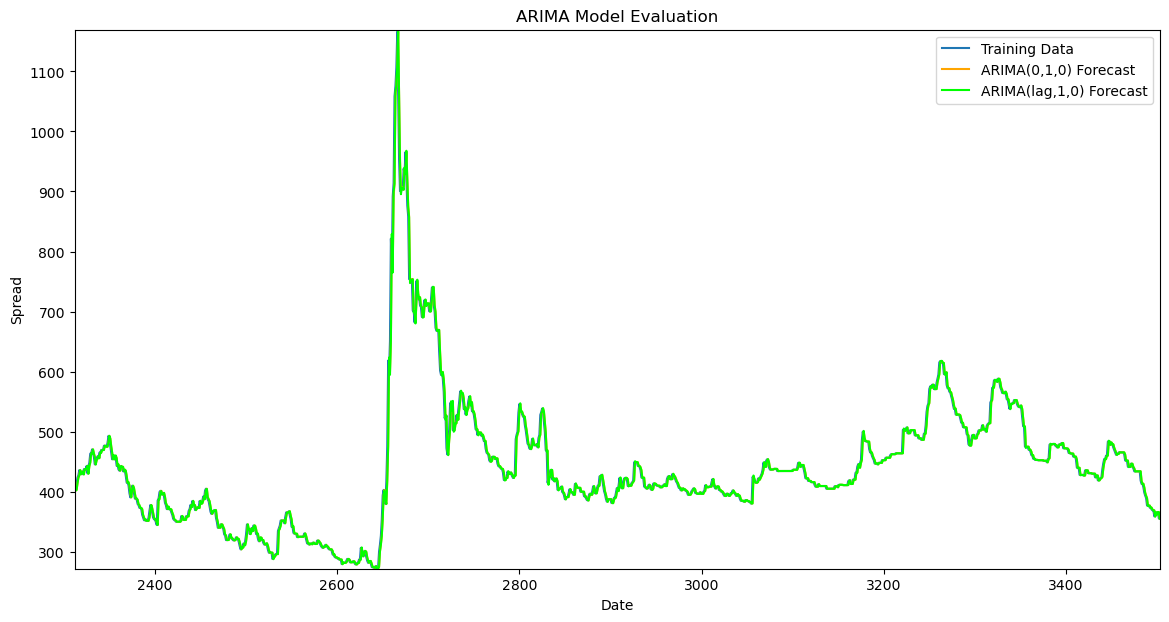


Evaluating column: China_33
China_33 ARIMA(0,1,0) Metrics:
RMSE: 2.3124, MAE: 1.0858, MAPE: 1.5641
China_33 ARIMA(4,1,0) Metrics:
RMSE: 2.2959, MAE: 1.1281, MAPE: 1.6187
Better model for China_33: ARIMA(0,1,0)


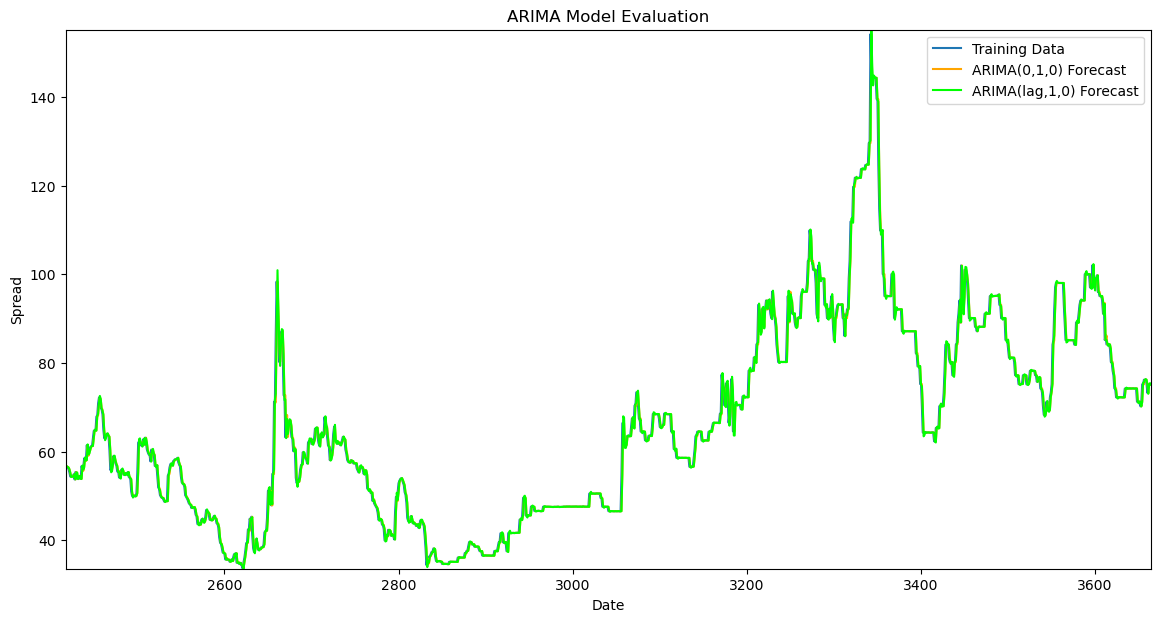


Evaluating column: China_103
China_103 ARIMA(0,1,0) Metrics:
RMSE: 4.3672, MAE: 0.8314, MAPE: 2.0224
China_103 ARIMA(2,1,0) Metrics:
RMSE: 4.3758, MAE: 0.8445, MAPE: 2.0745
Better model for China_103: ARIMA(0,1,0)


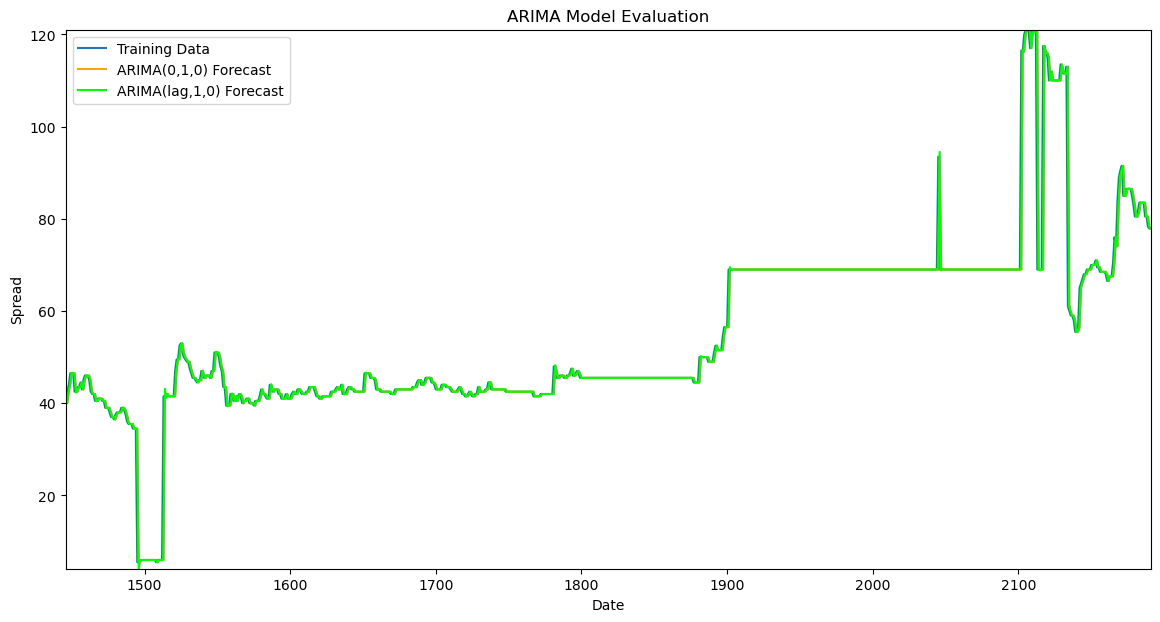


Evaluating column: China_165
China_165 ARIMA(0,1,0) Metrics:
RMSE: 2.5056, MAE: 1.4292, MAPE: 2.4265
China_165 ARIMA(5,1,0) Metrics:
RMSE: 2.5210, MAE: 1.4542, MAPE: 2.4673
Better model for China_165: ARIMA(0,1,0)


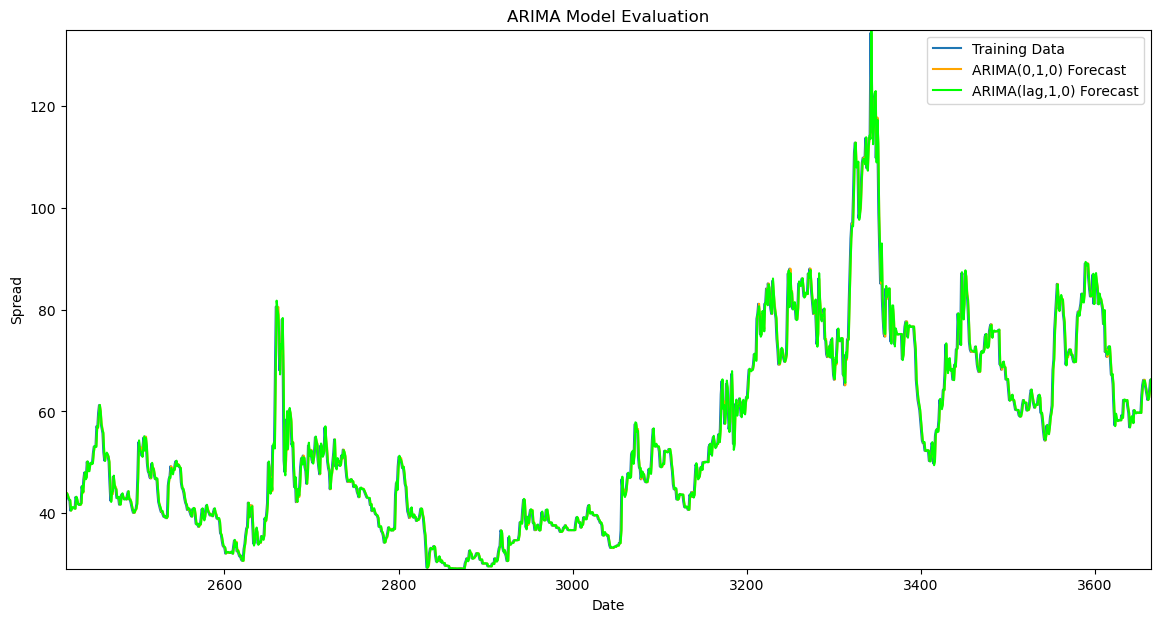


Evaluating column: China_169
China_169 ARIMA(0,1,0) Metrics:
RMSE: 2.5212, MAE: 1.1213, MAPE: 2.1169
China_169 ARIMA(4,1,0) Metrics:
RMSE: 2.5092, MAE: 1.1403, MAPE: 2.1514
Better model for China_169: ARIMA(0,1,0)


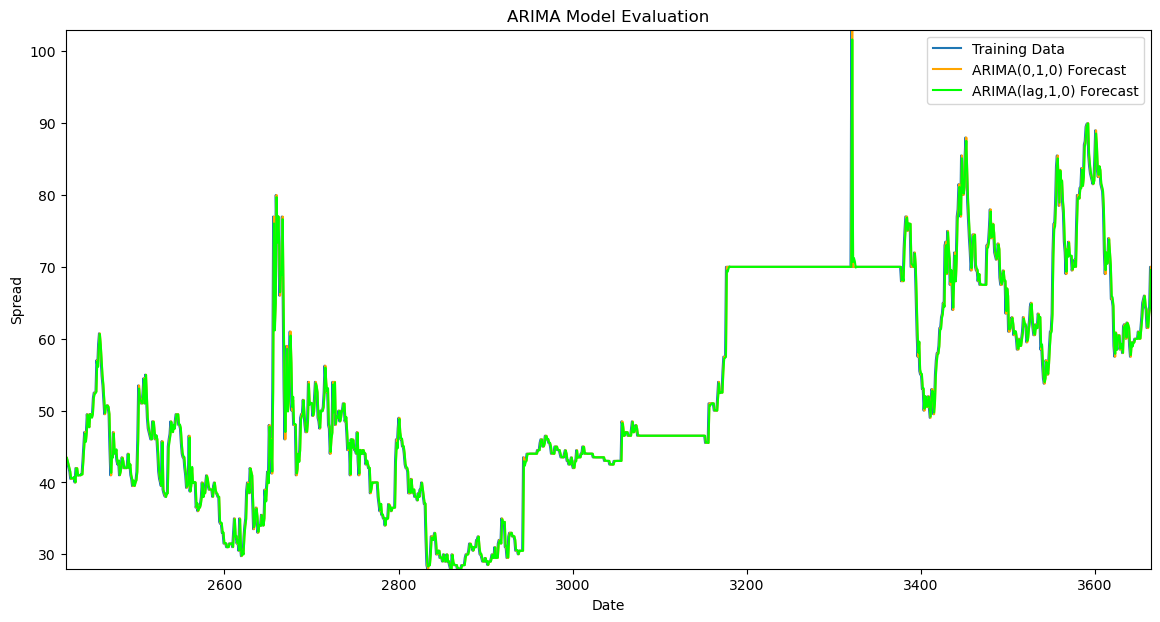


Evaluating column: China_203
China_203 ARIMA(0,1,0) Metrics:
RMSE: 4.9934, MAE: 1.8617, MAPE: 1.7300
China_203 ARIMA(2,1,0) Metrics:
RMSE: 5.0165, MAE: 1.8842, MAPE: 1.7535
Better model for China_203: ARIMA(0,1,0)


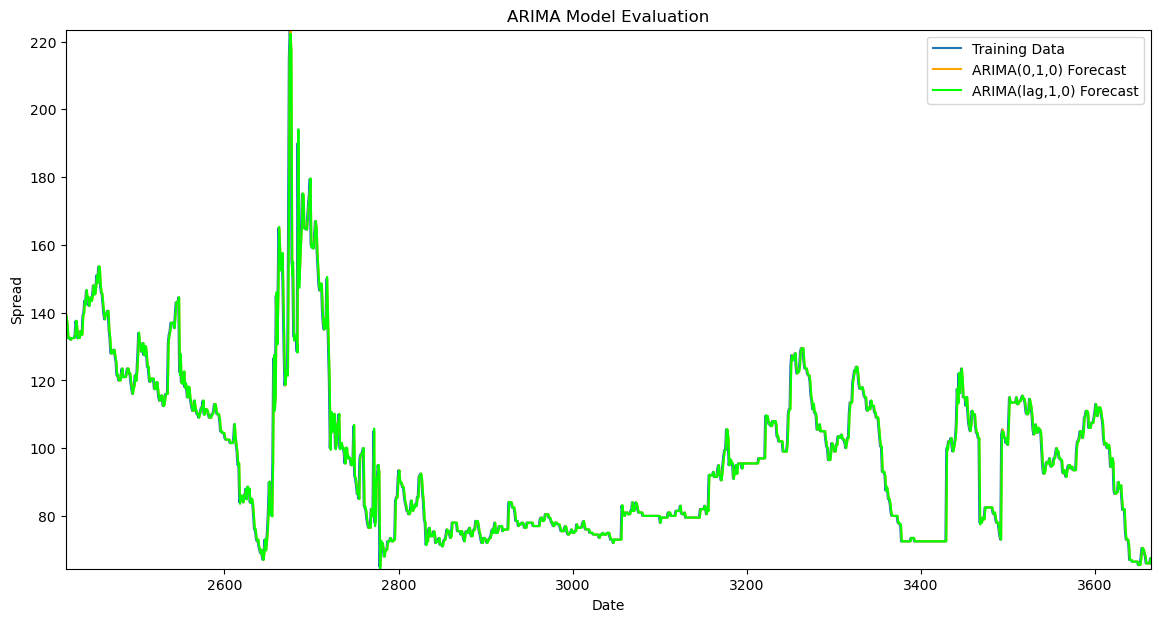


Evaluating column: China_209
China_209 ARIMA(0,1,0) Metrics:
RMSE: 2.1974, MAE: 0.6814, MAPE: 0.9164
China_209 ARIMA(4,1,0) Metrics:
RMSE: 2.2028, MAE: 0.7225, MAPE: 0.9647
Better model for China_209: ARIMA(0,1,0)


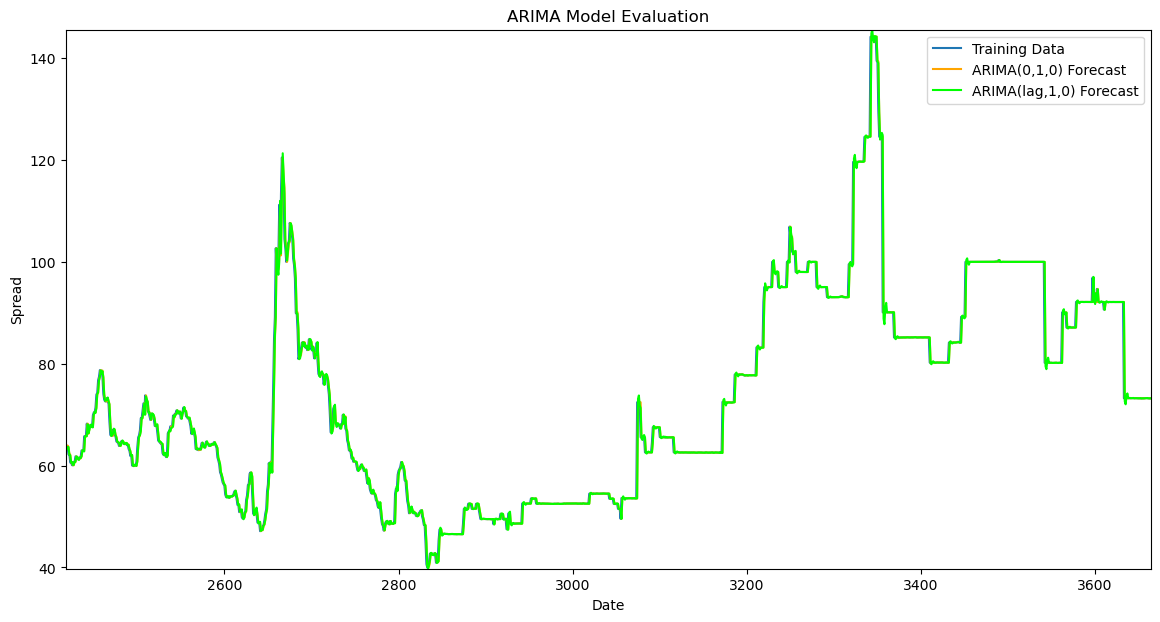


Evaluating column: China_213
China_213 ARIMA(0,1,0) Metrics:
RMSE: 3.2649, MAE: 1.1561, MAPE: 1.5555
China_213 ARIMA(2,1,0) Metrics:
RMSE: 3.2842, MAE: 1.1743, MAPE: 1.5808
Better model for China_213: ARIMA(0,1,0)


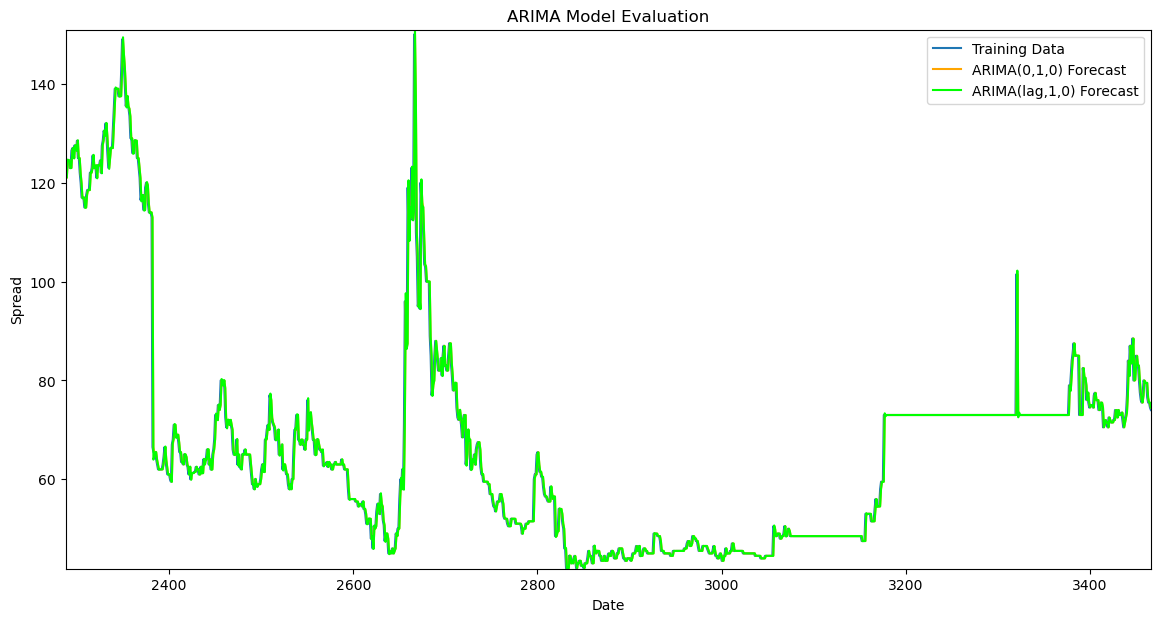


Evaluating column: China_228
China_228 ARIMA(0,1,0) Metrics:
RMSE: 4.8029, MAE: 2.1637, MAPE: 1.2663
China_228 ARIMA(3,1,0) Metrics:
RMSE: 4.8603, MAE: 2.2023, MAPE: 1.2874
Better model for China_228: ARIMA(0,1,0)


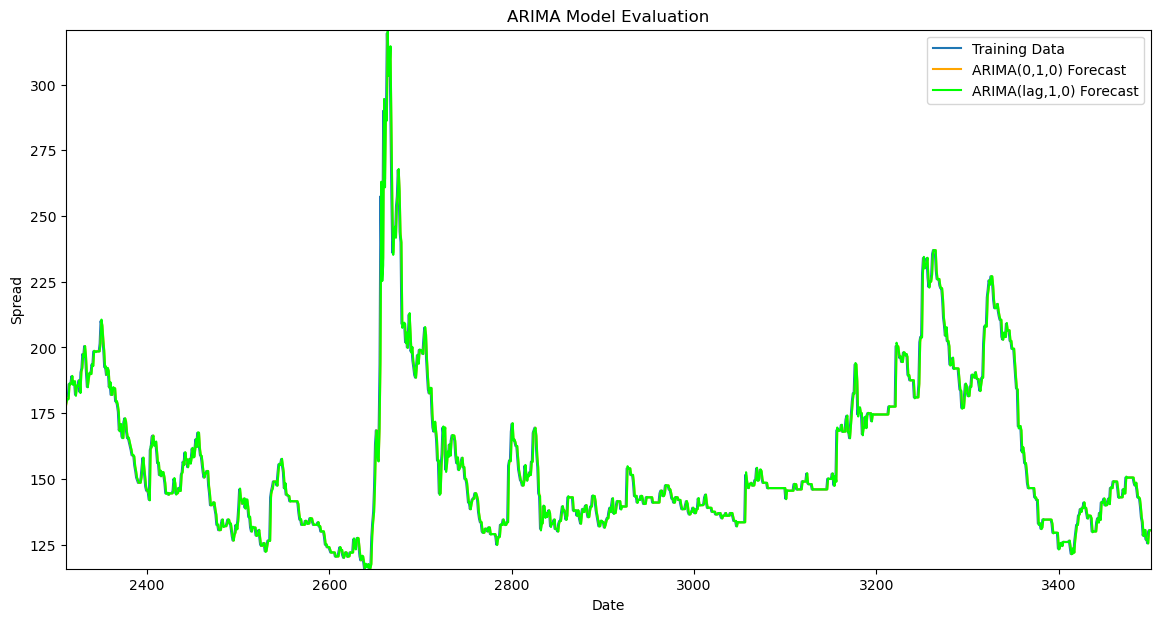


Evaluating column: China_250
China_250 ARIMA(0,1,0) Metrics:
RMSE: 2.1221, MAE: 1.1079, MAPE: 2.0041
China_250 ARIMA(2,1,0) Metrics:
RMSE: 2.1118, MAE: 1.1104, MAPE: 2.0064
Better model for China_250: ARIMA(0,1,0)


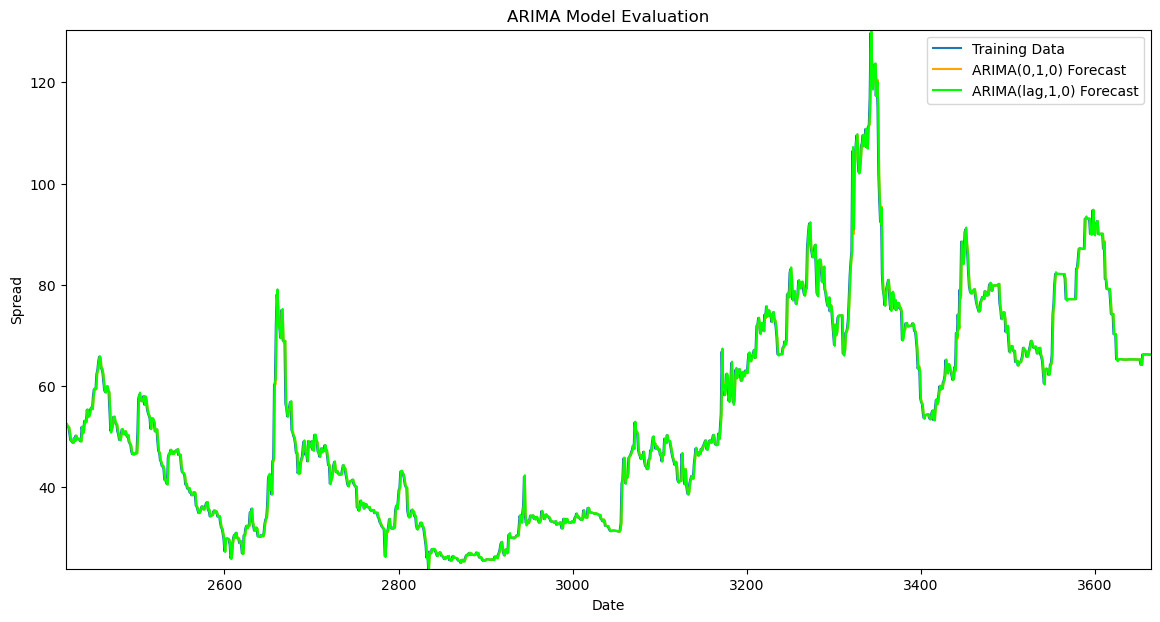


Evaluating column: China_265
China_265 ARIMA(0,1,0) Metrics:
RMSE: 11.6879, MAE: 4.6521, MAPE: 1.1492
China_265 ARIMA(6,1,0) Metrics:
RMSE: 11.7223, MAE: 4.8484, MAPE: 1.2025
Better model for China_265: ARIMA(0,1,0)


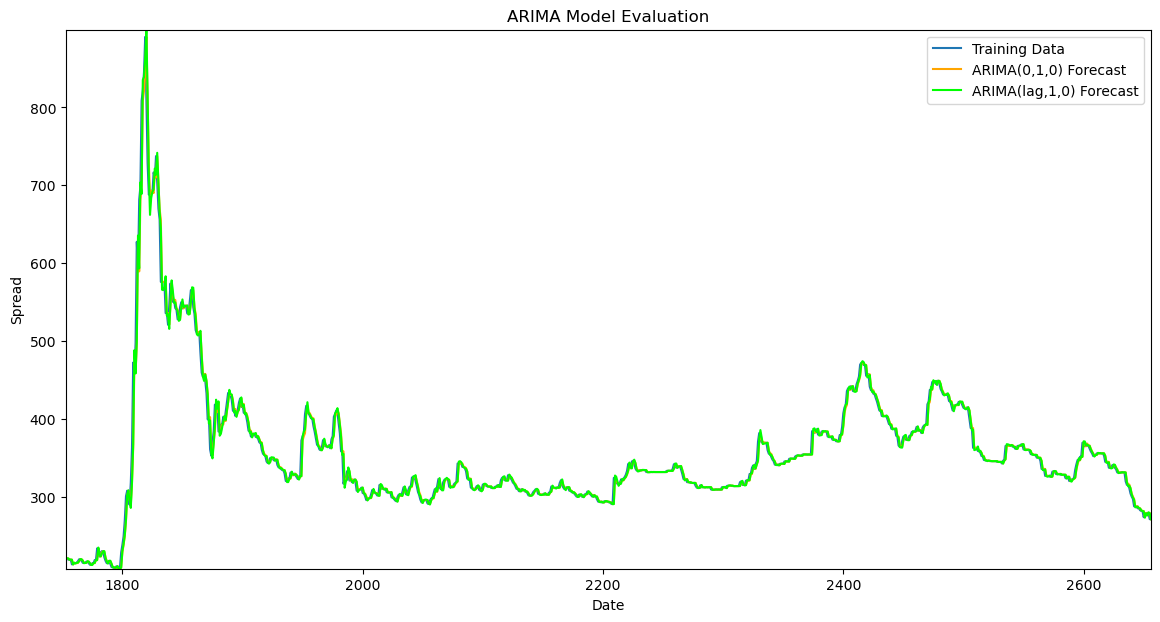

In [6]:
# Function to calculate MAPE
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Dictionaries to store fitted models and forecasts for each column
all_fitted_models = {}
all_forecasts = {}
    
# Create an empty DataFrame to store metrics
metrics_df = []

# Iterate over columns and compare models
for column in df.columns[1:12]:
    if column in chosen_lags:
        print(f"\nEvaluating column: {column}")
        series = df[column]
        column_name = column
        
        # Function to evaluate and compare models
        start_index = series.first_valid_index()
        end_index = series.last_valid_index()
        series = series.loc[start_index:end_index]
        series = series.reset_index(drop=True)
        size = int(len(series) * 0.66)
        train, test = series[0:size], series[size:len(series)]
        history = [x for x in train]
        
        
        rw_predictions = list()
        arima_predictions = list()
        test_data = list(test)

        # Walk-forward validation
        for t in range(len(test)):
            # Evaluate ARIMA(0,1,0) model
            rw_model = ARIMA(history, order=(0, 1, 0))
            rw_model_fit = rw_model.fit()
            rw_output = rw_model_fit.forecast()
            rw_yhat = rw_output[0]
            rw_predictions.append(rw_yhat)

            # Evaluate ARIMA(x,1,0) model
            lag = chosen_lags.get(column_name, 1)  # Default lag is 1 if not found in dictionary
            arima_model = ARIMA(history, order=(lag, 1, 0))
            arima_model_fit = arima_model.fit()
            arima_output = arima_model_fit.forecast()
            arima_yhat = arima_output[0]
            arima_predictions.append(arima_yhat)

            obs = test[t+len(train)]
            history.append(obs)
    
        # Evaluate forecasts
        rw_rmse = sqrt(mean_squared_error(test, rw_predictions))
        arima_rmse = sqrt(mean_squared_error(test, arima_predictions))
        rw_mae = mean_absolute_error(test, rw_predictions)
        arima_mae = mean_absolute_error(test, arima_predictions)
        rw_mape = mape(test, rw_predictions)
        arima_mape = mape(test, arima_predictions)

        # Inside the compare_models function, after calculating metrics
        metrics_df.append({
            'Column': column_name,
            'Model': 'ARIMA(0,1,0)',
            'RMSE': rw_rmse,
            'MAE': rw_mae,
            'MAPE': rw_mape
        })

        metrics_df.append({
            'Column': column_name,
            'Model': f'ARIMA({lag},1,0)',
            'RMSE': arima_rmse,
            'MAE': arima_mae,
            'MAPE': arima_mape
        })

        # Compare models
        
        # Compare models based on all metrics
        rw_better_count = 0
        arima_better_count = 0
        
        if rw_rmse < arima_rmse:
            rw_better_count += 1
        else:
            arima_better_count += 1

        if rw_mae < arima_mae:
            rw_better_count += 1
        else:
            arima_better_count += 1

        if rw_mape < arima_mape:
            rw_better_count += 1
        else:
            arima_better_count += 1
            
        if rw_better_count > arima_better_count:
            better_model = "ARIMA(0,1,0)"
        elif arima_better_count > rw_better_count:
            better_model = f"ARIMA({lag},1,0)"
        else:
            better_model = "No clear winner"
            
        # Print forecast metrics and the better model
        print(f"{column_name} ARIMA(0,1,0) Metrics:")
        print(f"RMSE: {rw_rmse:.4f}, MAE: {rw_mae:.4f}, MAPE: {rw_mape:.4f}")
        print(f"{column_name} ARIMA({lag},1,0) Metrics:")
        print(f"RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, MAPE: {arima_mape:.4f}")
        print(f"Better model for {column_name}: {better_model}")
    
        # Store fitted models and forecasts for the current columns
        fitted_models = {'rw_model': rw_model_fit, 'arima_model': arima_model_fit}
        forecasts = {'rw_predictions': rw_predictions, 'arima_predictions': arima_predictions, 'test_data': test_data}
        all_fitted_models[column_name] = fitted_models
        all_forecasts[column_name] = forecasts

        # Create a plot to compare the forecast with the actual test data
        plt.figure(figsize=(14, 7))
        plt.plot(series, label='Training Data')
        # Create Series objects for the predictions
        test_forecast_series_rw = pd.Series(rw_predictions, index=test.index)
        test_forecast_series_arima = pd.Series(arima_predictions, index=test.index)
        # Determine the relevant range for zooming
        x_min, x_max = test.index.min(), test.index.max()
        y_min, y_max = min(test.min(), test_forecast_series_rw.min(), test_forecast_series_arima.min()), max(test.max(), test_forecast_series_rw.max(), test_forecast_series_arima.max())
        # Plot the data
        plt.plot(test_forecast_series_rw, label='ARIMA(0,1,0) Forecast', color='orange')
        plt.plot(test_forecast_series_arima, label='ARIMA(lag,1,0) Forecast', color='lime')
        # Zoom in on the relevant range
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.title('ARIMA Model Evaluation')
        plt.xlabel('Date')
        plt.ylabel('Spread')
        plt.legend()
        plt.show()

In [ ]:
metrics_df = pd.DataFrame(metrics_df)

In [ ]:
# After the loop over columns

# Create an empty dictionary to store the reshaped data
reshaped_data = {}

# Loop through each column name (series) in all_forecasts
for column_name, forecasts in all_forecasts.items():
    # Unpack the forecasts for the current column
    rw_predictions, arima_predictions, test_data = forecasts['rw_predictions'], forecasts['arima_predictions'], forecasts['test_data']
    # Create a DataFrame for the current column
    column_df = pd.DataFrame({
        'index': range(len(rw_predictions)),
        f'rw_predictions_{column_name}': rw_predictions,
        f'arima_predictions_{column_name}': arima_predictions,
        f'test_data_{column_name}': test_data
    })

    # Append the DataFrame to the reshaped_data dictionary
    for col in column_df.columns:
        reshaped_data[col] = column_df[col]

In [ ]:
# Create the final DataFrame with predictions
forecasts_df = pd.DataFrame(reshaped_data)

# Export the DataFrame to an Excel file
forecasts_df.to_excel('all_forecasts_China.xlsx', index=False)

In [ ]:
# After the loop over columns
# Export the metrics DataFrame to an Excel file
metrics_df.to_excel('all_metrics_China.xlsx', index=False)

In [ ]:
# Export model summaries from all_fitted_models to a Word file
document = docx.Document()
for column_name, models in all_fitted_models.items():
    document.add_heading(f'Column: {column_name}', level=0)
    rw_model_fit = models['rw_model']
    arima_model_fit = models['arima_model']
    lag = chosen_lags.get(column_name, 1)

    document.add_heading('ARIMA(0,1,0) Summary:', level=1)
    document.add_paragraph(str(rw_model_fit.summary()))

    document.add_heading(f'ARIMA({lag},1,0) Summary:', level=1)
    document.add_paragraph(str(arima_model_fit.summary()))

document.save('model_summaries_China.docx')